In [2]:
from sympy import *
mm=0.001 


def yw(w,L,E,I):
    x=S('x')
    return -w/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2)

def yf(f,L,E,I):
    x=S('x')
    return f/(6*E*I)*(x**3-3*L*x**2)

def ym(M,L,E,I):
    return -M/(2*E*I)*x**2

def yf_2pin(f,L,E,I): #L是两端点之间的距离
    return f/(48*E*I)*(4*x**3-3*L**2*x)

def yw_2pin(w,L,E,I): #L是两端点之间的距离
    return -w/(24*E*I)*(x**4-2*L*x**3+L**3*x)

知识重点
---
1. 叠加法

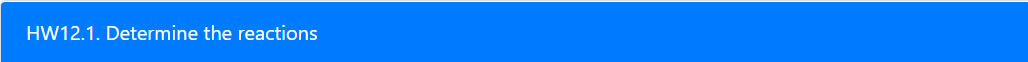

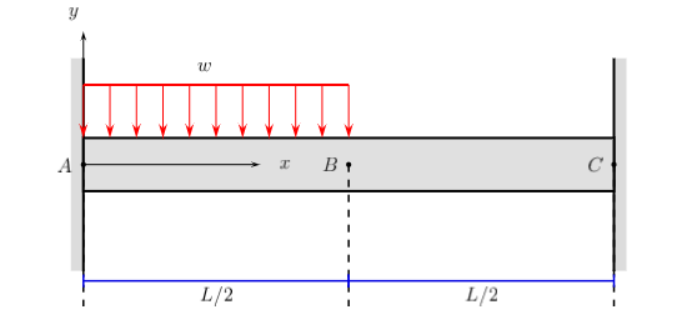

In [58]:
L = 5 # m
E = 154 # GPa
Iz = 0.000051 # m^4
w = 10 # kN/m
#################################复制部分
#################################单位转化
x,Fa,Fc,Ma,Mc=S('x,Fa,Fc,Ma,Mc')


#形变
#①对w分析
L1=L/2
y11=yw(w,L/2,E,Iz)
k=diff(y11,x,1).subs(x,L/2)
h=diff(y11,x,0).subs(x,L/2)
y12=k*(x-L/2)+h

#②对Fc分析
L2=L
y2=-Fc/(6*E*Iz)*(x**3-3*L2*x**2)

#③对Mc分析
y3=+Mc/(2*E*Iz)*x**2

equ_delta=(y12+y2+y3).subs(x,L)      #末端形变=0
equ_k=diff(y12+y2+y3,x,1).subs(x,L)  #末端导数0=0
equ_Fy=Fa+Fc-w*L/2
equ_M=Ma+Mc-0.5*w*L*L/2


solve([equ_Fy,equ_M,equ_delta,equ_k],[Fa,Fc,Ma,Mc])

{Fa: 20.3124999999999,
 Fc: 4.68750000000006,
 Ma: 69.0104166666668,
 Mc: -6.51041666666684}

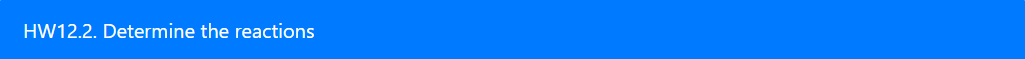

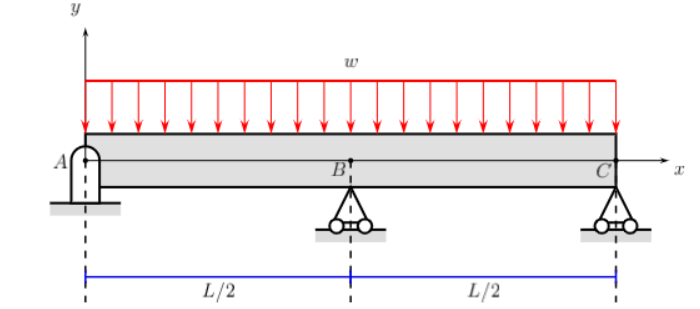

注意这里两端是三角支点，在两头都有限制，应使用另一条公式2_pin

In [69]:
L = 8 # m
E = 202 # GPa
Iz = 0.000046 # m^4
w = 7 # kN/m
#########################复制部分
x,Fb,Fc=S('x,Fb,Fc')

#①w产生的形变
y1=yw_2pin(w,L,E,Iz)

#②因为Fb产生的形变
y2=yf_2pin(-Fb,L,E,Iz)

equ_delta=(y1+y2).subs(x,L/2) #注意是中点处的形变
equy=Fc+Fb+Fc-w*L
equM=Fb*0.5*L+Fc*L-0.5*w*L*L  #以A点作为转轴计算力矩

solve([equ_delta,equy,equM],[Fb,Fc])

{Fc: 10.5000000000001, Fb: 34.9999999999999}

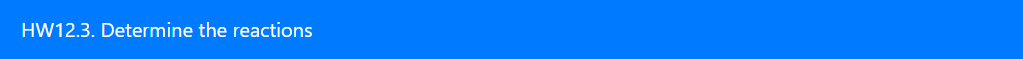

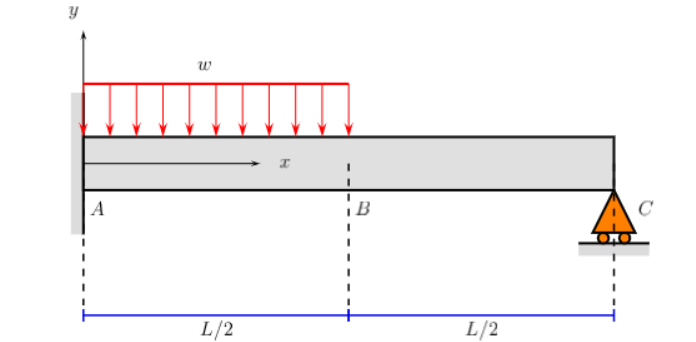

In [12]:
L = 7 # m
w = 8 # kN/m
##############################复制部分
Fa,Fc,Ma,E,I=S('Fa,Fc,Ma,E,I')

#①w产生的形变
y1_1=yw(w,L/2,E,I)
k=diff(y1_1,x,1).subs(x,L/2)
h=diff(y1_1,x,0).subs(x,L/2)
y1_2=k*(x-L/2)+h
y1=y1_2

#②Fc产生的形变
y2=yf(-Fc,L,E,I)


#平衡公式
equFy=Fa+Fc-w*L/2
equM=Ma+Fc*L-0.5*w*0.5*L*0.5*L
equ_delta=(y1+y2).subs(x,L)

solve([equFy,equM,equ_delta],[Fa,Fc,Ma])

{Fa: 24.9375000000000, Fc: 3.06250000000000, Ma: 27.5625000000000}

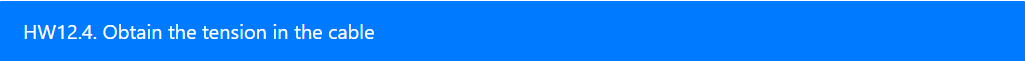

**本题注意beam的形变是负的，cable的形变是正的，所以要加起来**  
**见平衡公式 equ_delta**

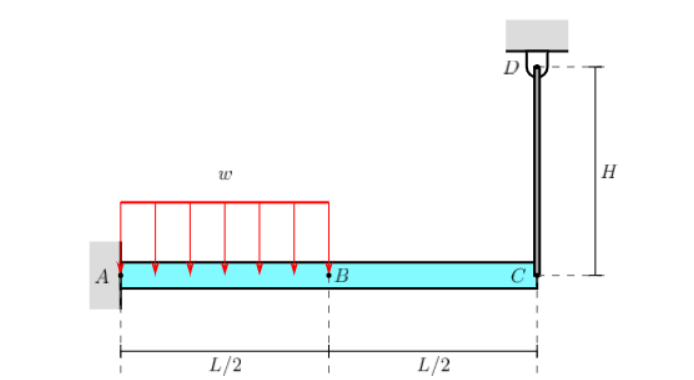

In [4]:
from sympy import *

L = 6 # m
H = 2 # m
E = 189 # GPa
Iz = 55000000 # mm^4
w = 9 # kN/m
A = 200 # mm^2
#####################复制部分
E*=1e9
A*=mm*mm
Iz*=mm**4

Fa,Fc,Ma=S('Fa,Fc,Ma')
x=S('x')
#①w产生的形变
y1_1=yw(w,L/2,E,Iz)
k=diff(y1_1,x,1).subs(x,L/2)
h=diff(y1_1,x,0).subs(x,L/2)
y1_2=k*(x-L/2)+h
y1=y1_2

#②Fc产生的形变
y2=yf(-Fc,L,E,Iz)

#总形变
delta_beam=(y1+y2).subs(x,L)  #负数

#cable产生的形变
k3=E*A/H
delta_cable=Fc/k3             #正数

#平衡公式
equFy=Fa+Fc-w*L/2
equM=Ma+Fc*L-0.5*w*0.5*L*0.5*L
equ_delta=delta_beam+delta_cable

solve([equFy,equM,equ_delta],[Fa,Fc,Ma])


{Fa: 24.0692625775327, Fc: 2.93073742246727, Ma: 22.9155754651964}

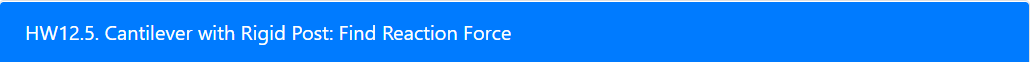

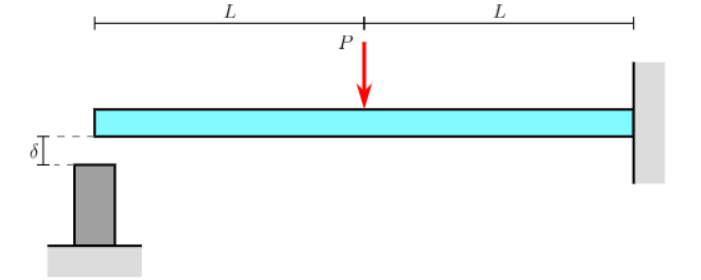

In [47]:
P = 51 # kN
L = 1766 # mm
delta = 3 # mm
E = 143 # GPa
Iz = 122982421 # mm^4
#################################复制部分
P*=1000  
L*=mm
delta*=mm
E*=1e9
Iz*=mm**4
#################################单位转化

F_post,F_support,M_support=S('F_post,F_support,M_support')

#①计算P产生的向下形变
y1_1=yf(P,L,E,Iz) #注意这里是L
k=diff(y1_1,x,1).subs(x,L)
h=diff(y1_1,x,0).subs(x,L)
y1_2=k*(x-L)+h
y1=y1_2

#②计算post力产生的向上形变
y2=yf(-F_post,2*L,E,Iz)

delta_beam=(y1+y2).subs(x,2*L)  #负的

#平衡公式
equFy=F_post+F_support-P
equM=M_support-P*L+F_post*2*L
equ_delta=delta_beam+delta


ans=solve([equFy,equM,equ_delta],[F_post,F_support,M_support])
print(float(ans[F_post])/1000)
ans

12.345308338668353


{F_post: 12345.3083386684,
 F_support: 38654.6916613316,
 M_support: 46462.3709478234}

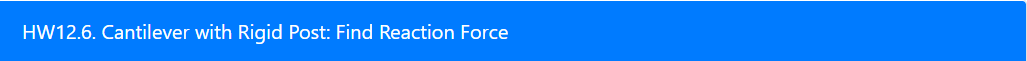

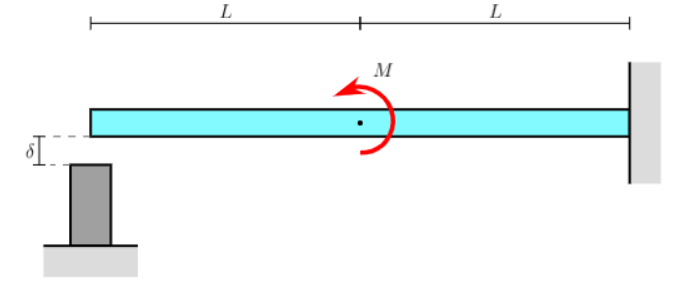

In [54]:
M = 66 # kN.m
L = 1655 # mm
delta = 2 # mm
E = 147 # GPa
Iz = 115624000 # mm^4
#########################复制部分
M*=1000
L*=mm
delta*=mm
E*=1e9
Iz*=mm**4
#########################单位转化

F_post,F_support,M_support=S('F_post,F_support,M_support')

#①由M产生向下的形变
y1_1=ym(M,L,E,Iz)
k=diff(y1_1,x,1).subs(x,L)
h=diff(y1_1,x,0).subs(x,L)
y1_2=k*(x-L)+h
y1=y1_2

#②计算post力产生的向上形变
y2=yf(-F_post,2*L,E,Iz)

#总形变
delta_beam=(y1+y2).subs(x,2*L)  #负的

#平衡公式
equFy=F_post+F_support-P
equM=M_support-P*L+F_post*2*L
equ_delta=delta_beam+delta

ans=solve([equFy,equM,equ_delta],[F_post,F_support,M_support])
print(float(ans[F_post])/1000)
ans

19.61991229981799


{F_post: 19619.9122998180,
 F_support: 31380.0877001820,
 M_support: 19463.0902876024}

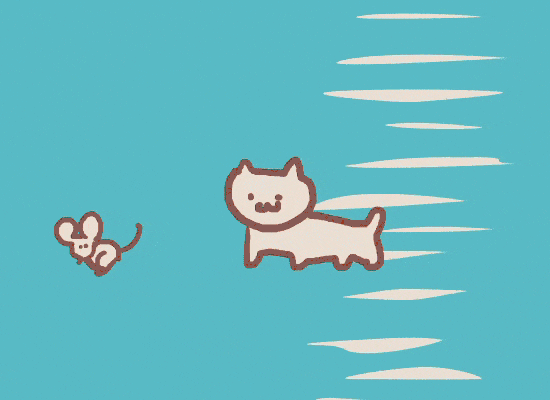